In [1]:
import pickle
from tslearn.generators import random_walks
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_som.som import SOM
import numpy as np
from tslearn.clustering import silhouette_score

# Andiamo a caricare le serie temporali degli indici vigitali

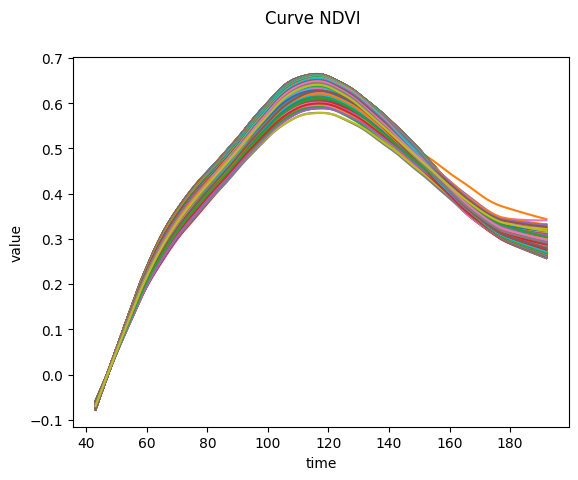

In [2]:
with open('./pickles/ndvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
NDVI.plot()
print() #fix duplicate plot

# Esempio di clustering

In [3]:
X = random_walks(n_ts=5000, sz=32, d=1)

print(NDVI.data_matrix.shape)

(1579, 150, 1)


C:\Users\pc\AppData\Local\Temp\ipykernel_11296\3486172220.py:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[0].plot(xx.ravel(), "k-", alpha=.2,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\3486172220.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(xx.ravel(), "k-", alpha=.2,color="salmon")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\3486172220.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs[2].plot(xx.ravel(), "k-", alpha=.2,color="red")


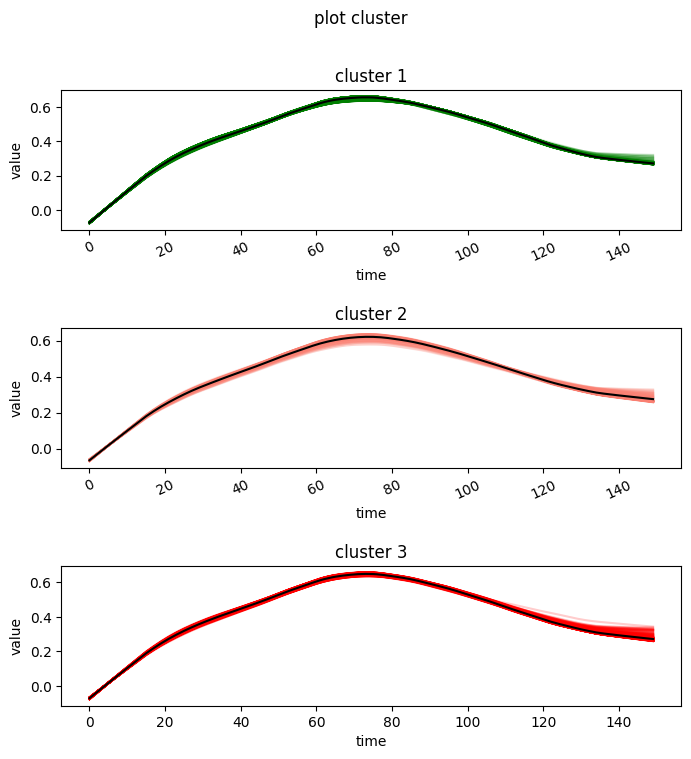

In [4]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=50,
                      random_state=0)
y_pred = km.fit_predict(NDVI.data_matrix)

#img = plt.figure()

'''for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in NDVI.data_matrix[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, NDVI.data_matrix.shape[1])
    plt.ylim(0, 0.7)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")'''

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.7)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for xx in NDVI.data_matrix[y_pred == 0]:
        axs[0].plot(xx.ravel(), "k-", alpha=.2,color="green")

axs[0].plot(range(0,150),km.cluster_centers_[0].ravel(),color="black")
axs[0].set_title("cluster 1")
axs[0].set_xlabel("time")
axs[0].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 1]:
        axs[1].plot(xx.ravel(), "k-", alpha=.2,color="salmon")

axs[1].plot(range(0,150),km.cluster_centers_[1],color="black")
axs[1].set_title("cluster 2")
axs[1].set_xlabel("time")
axs[1].set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 2]:
        axs[2].plot(xx.ravel(), "k-", alpha=.2,color="red")

axs[2].plot(range(0,150),km.cluster_centers_[2],color="black")
axs[2].set_title("cluster 3")
axs[2].set_xlabel("time")
axs[2].set_ylabel("value")
plt.sca(axs[1])
plt.xticks(rotation=25)
plt.show()

# Stampa dell'insieme dei cluster

C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2201573758.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2201573758.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2201573758.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="#FFFFE0")


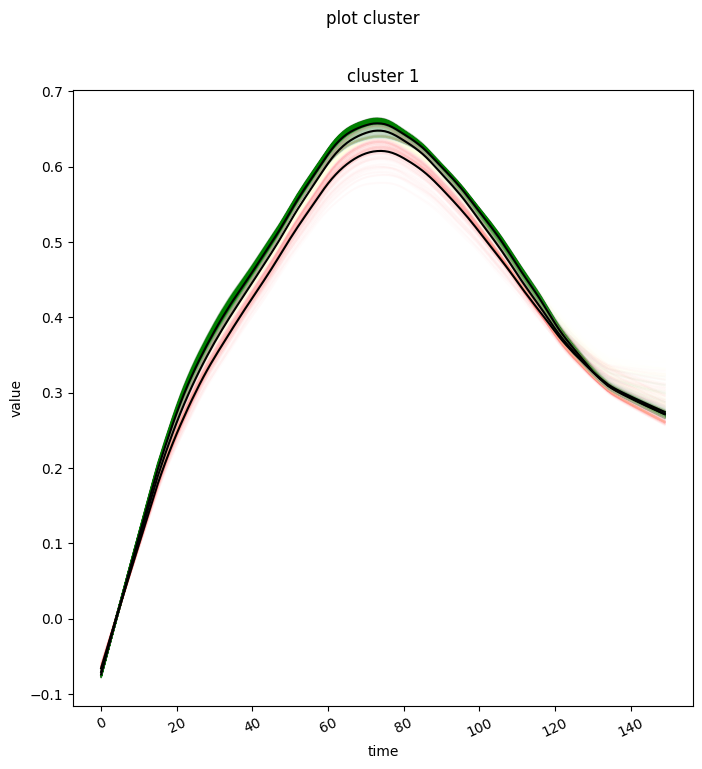

In [5]:
transparent = 0.01

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

for xx in NDVI.data_matrix[y_pred == 0]:
        axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")


axs.set_title("cluster 1")
axs.set_xlabel("time")
axs.set_ylabel("value")

for xx in NDVI.data_matrix[y_pred == 1]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")




for xx in NDVI.data_matrix[y_pred == 2]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="#FFFFE0")

axs.plot(range(0,150),km.cluster_centers_[0],color="black")
axs.plot(range(0,150),km.cluster_centers_[1],color="black")
axs.plot(range(0,150),km.cluster_centers_[2],color="black")

plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

In [6]:
with open('./pickles/allPixelNDVIPoly.pickle', 'rb') as handle:
    allPixelNDVIPoly = pickle.load(handle)
print(allPixelNDVIPoly.shape) #fix duplicate plot

(1579, 150)


In [7]:
with open('./pickles/newResa3.pickle', 'rb') as handle:
    newResa3 = pickle.load(handle)
print(newResa3.shape) #fix duplicate plot

(1579,)


# Eliminiamo le serie temporali che sono associate a rese sbagliate

In [8]:
allPixelNDVIPoly = allPixelNDVIPoly[(newResa3<=11000) & (newResa3 >= 4000),:]
newResa3 = newResa3[(newResa3<=11000) & (newResa3 >= 4000)]

(1471, 150)


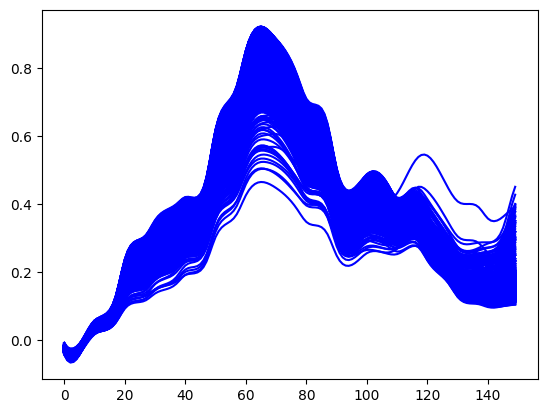

In [9]:
for a in range(0,allPixelNDVIPoly.shape[0]):
    plt.plot(range(0,150),allPixelNDVIPoly[a,:],color='blue')

print(allPixelNDVIPoly.shape)
plt.show()

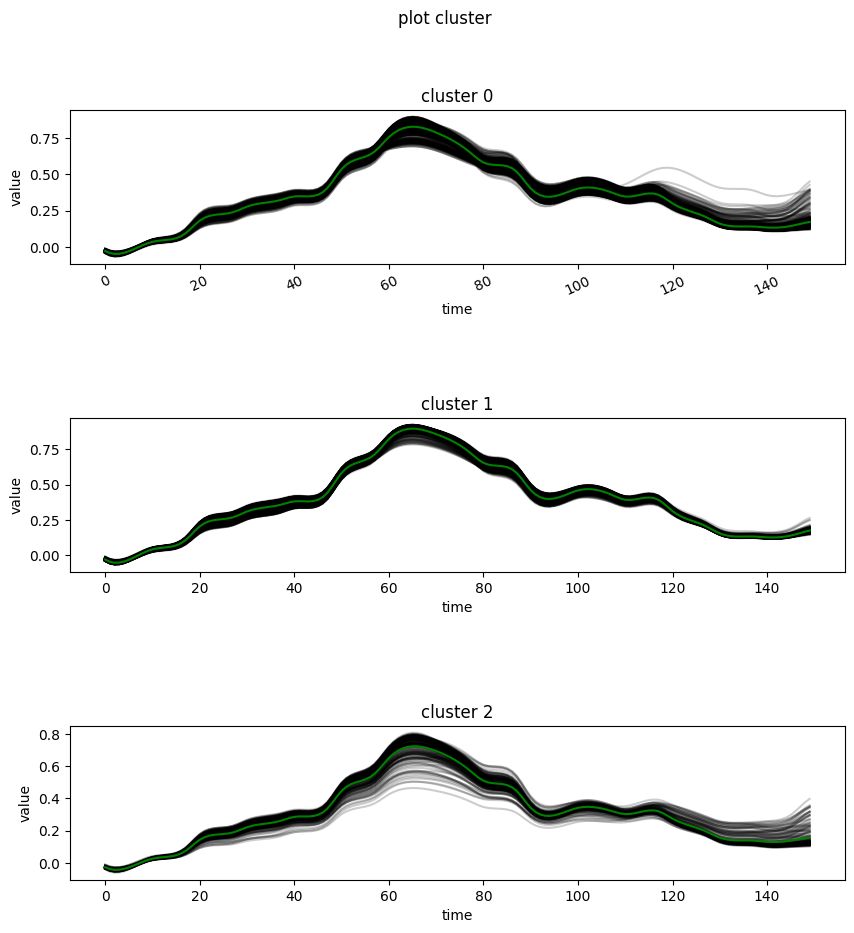

In [10]:
num_cluster = 3

km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=100,
                      random_state=0)
y_pred = km.fit_predict(allPixelNDVIPoly)

fig, axs = plt.subplots(nrows=num_cluster, ncols=1, figsize=(10, 10))
plt.subplots_adjust(hspace=1)
fig.suptitle('plot cluster')
plt.sca(axs[0])
plt.xticks(rotation=25) # Rotate label

for b in range(0,num_cluster):
    
    for xx in allPixelNDVIPoly[y_pred == b]:
        axs[b].plot(xx.ravel(), "k-", alpha=.2)

    axs[b].plot(range(0,150),km.cluster_centers_[b].ravel(),color="green")
    axs[b].set_title("cluster "+str(b))
    axs[b].set_xlabel("time")
    axs[b].set_ylabel("value")
    plt.sca(axs[b])

plt.show()

# Stampa migliore dei tre cluster insieme

C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2457642791.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2457642791.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")
C:\Users\pc\AppData\Local\Temp\ipykernel_11296\2457642791.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  axs.plot(xx.ravel(), "k-", alpha=transparent,color="purple")


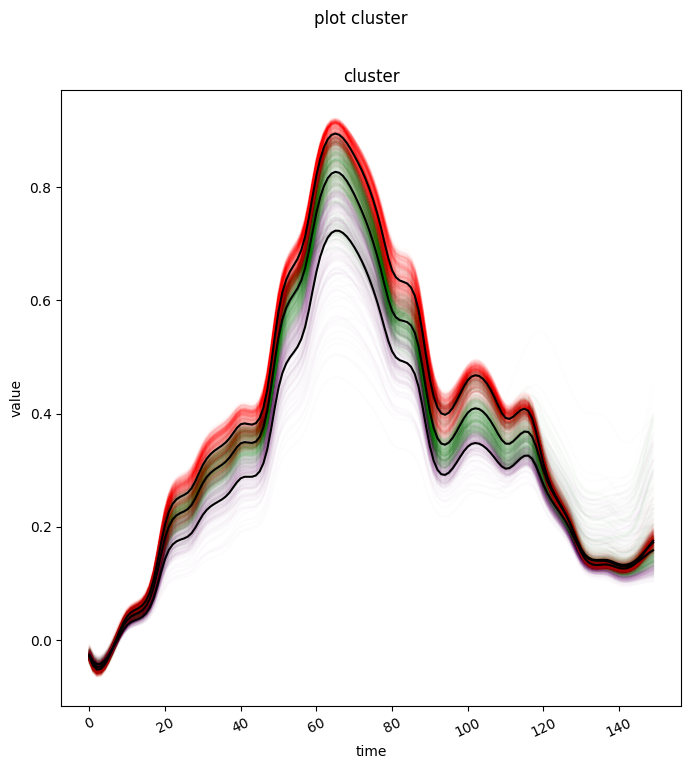

In [11]:
transparent = 0.01

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
fig.suptitle('plot cluster')
plt.sca(axs)
plt.xticks(rotation=25) # Rotate label

for xx in allPixelNDVIPoly[y_pred == 0]:
        axs.plot(xx.ravel(), "k-", alpha=0.01,color="green")


axs.set_title("cluster")
axs.set_xlabel("time")
axs.set_ylabel("value")

for xx in allPixelNDVIPoly[y_pred == 1]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="red")




for xx in allPixelNDVIPoly[y_pred == 2]:
        axs.plot(xx.ravel(), "k-", alpha=transparent,color="purple")

axs.plot(range(0,150),km.cluster_centers_[0],color="black")
axs.plot(range(0,150),km.cluster_centers_[1],color="black")
axs.plot(range(0,150),km.cluster_centers_[2],color="black")

plt.sca(axs)
plt.xticks(rotation=25)
plt.show()

# Cerchiamo il numero K migliore per la nostra operazione di clustering

In [12]:
distortions = []

for i in range(1,11):
    km = TimeSeriesKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(allPixelNDVIPoly)
    distortions.append(km.inertia_)

# Stampo il grafico

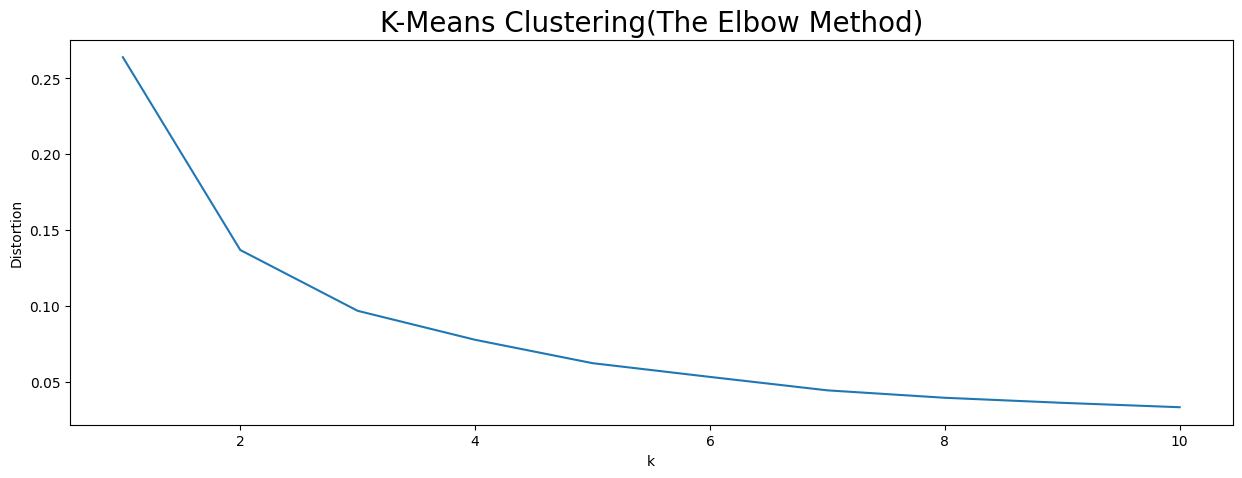

In [13]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [14]:
rese_c1 = newResa3[y_pred == 0]
rese_c2 = newResa3[y_pred == 1]
rese_c3 = newResa3[y_pred == 2]
series_c1 = allPixelNDVIPoly[y_pred == 0]
print(rese_c1.shape)
print(series_c1.shape)

(649,)
(649, 150)


# Calcolo della silhoutte dei cluster e di altre metriche

In [15]:
silhouette_score(allPixelNDVIPoly,y_pred,metric="euclidean")

# Calcoliamo il 'centroide' come la media della resa dei cluster

rese = [rese_c1,rese_c2,rese_c3]
meanValue = []

for a in rese:
    meanValue.append(np.mean(a))

# Calcolo le metriche di coesione

coesion = []
separation = []

for a,b in zip(meanValue,rese):   
    sum = 0
    for c in b:
        sum += (c-a)**2
    print(np.sqrt(sum/(len(b)-1)))
    print(len(b))
    coesion.append(np.sqrt(sum/(len(b)-1)))

# Calcolo della separazione

for a in meanValue:
    separation.append([])
    for b in meanValue:
        separation[-1].append(abs(a-b))
    


982.4676669838171
649
1026.6567173565402
633
1046.144493645517
189


In [16]:
# Calcolo le metriche di separazione

for a,i in zip(rese,range(0,3)):
    for b,j in zip(rese,range(0,3)):
        if(i == j):
            continue
        for c in a:
            sum = 0
            for d in b:
                sum += abs(c-d)

# Stampiamo box plot dei cluster

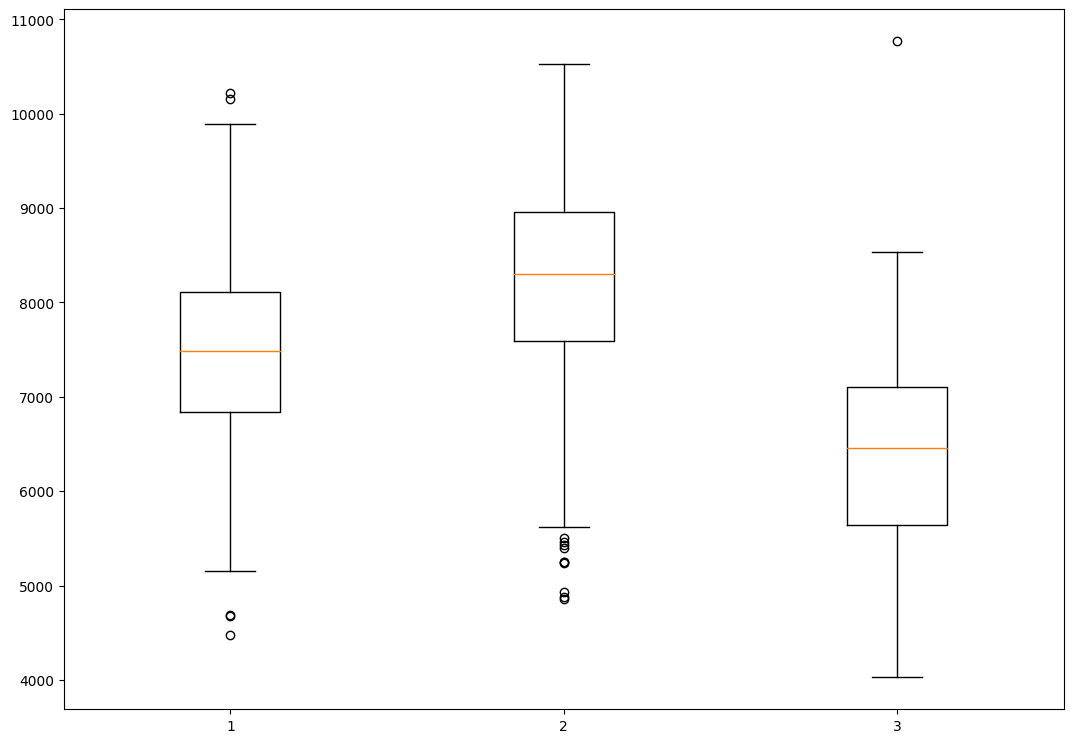

In [17]:

# Creating dataset
np.random.seed(10)

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating plot
bp = ax.boxplot([rese_c1,rese_c2,rese_c3])

# show plot
plt.show()


# Utilizziamo il dbscan per cercare di estrarre i cluster

In [18]:

db = DBSCAN(eps=0.1, min_samples=6).fit(NDVI.data_matrix[:,:,0])
labels = db.labels_


In [19]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 4


(1579,)


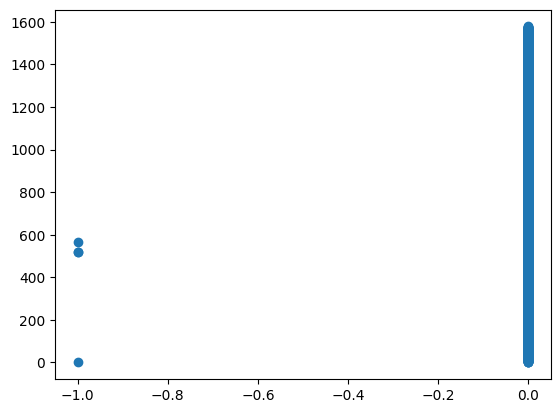

In [20]:
print(labels.shape)
plt.scatter(labels,range(0,1579))

# Implementazione della matrice 3D

In [21]:
with open('./pickles/AllPixelBand3.pickle', 'rb') as handle:
    bande3 = pickle.load(handle)
print(bande3.shape) #fix duplicate plot

(1579, 12, 150)


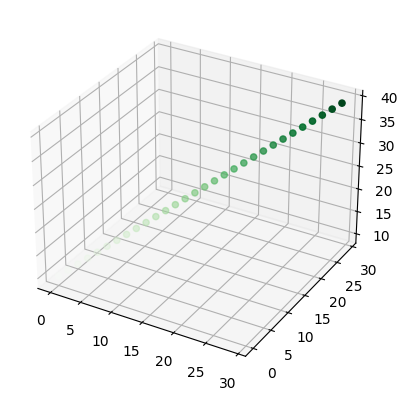

In [22]:

fig = plt.figure()
ax = fig.add_subplot( projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 100)
xline = np.linspace(0, 30) # Asse delle durate 
yline = np.linspace(0, 30) # Asse degli starting point
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = np.array(range(0,30))
xdata = np.array(range(0,30))
ydata = np.array(range(0,30))
ax.scatter3D(xdata, ydata, zdata+10, c=zdata, cmap='Greens')

(1471, 95)


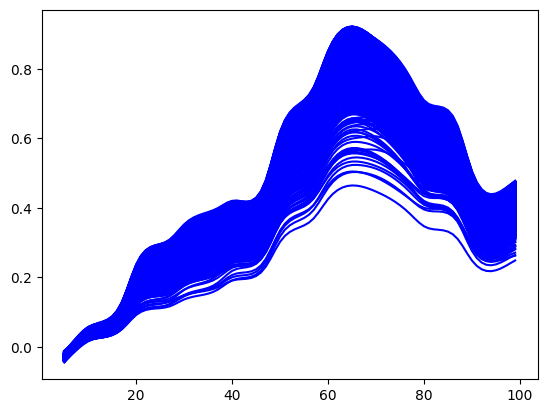

In [23]:
durata = 150-50
starting_point = 5

new_series = allPixelNDVIPoly[:,starting_point:durata]

for a in range(0,new_series.shape[0]):
    plt.plot(range(starting_point,durata),new_series[a,:],color='blue')

print(new_series.shape)
plt.show()

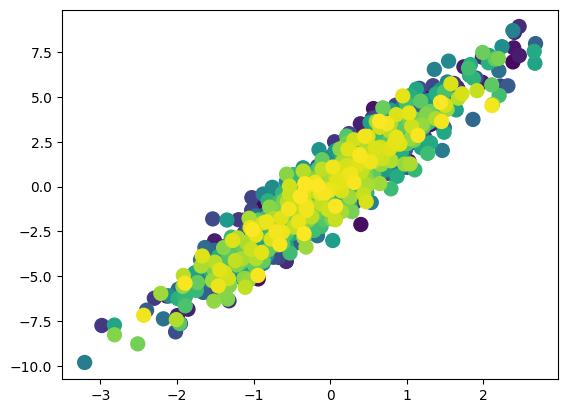

In [24]:
# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = range(0,1000)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

(15, 15)
[[0.05682538 0.04259271 0.63572183 0.2399937  0.08991266 0.17923857
  0.03181031 0.4366531  0.06098674 0.95178952 0.80345912 0.39981641
  0.70839292 0.95824881 0.07714784]
 [0.0703908  0.5939733  0.27908356 0.650183   0.58396595 0.04716147
  0.4705662  0.53578424 0.22616088 0.99610545 0.89134237 0.52395038
  0.11306593 0.93227811 0.30646285]
 [0.02865114 0.15312442 0.18278299 0.12163344 0.16563768 0.09104224
  0.52194354 0.84183127 0.3422337  0.74135821 0.78773808 0.85992912
  0.17859363 0.37672864 0.62837012]
 [0.13264335 0.59663812 0.87879439 0.19928425 0.06098229 0.55326377
  0.8115738  0.7007786  0.04423432 0.74638328 0.66811426 0.54301977
  0.28593769 0.8973488  0.55557467]
 [0.11597036 0.71646207 0.396      0.3731889  0.25878322 0.96249779
  0.53552632 0.46285913 0.01512827 0.57529036 0.70558136 0.04901088
  0.10504369 0.91041523 0.10784147]
 [0.53161787 0.16568382 0.79064989 0.49419924 0.97270369 0.6521415
  0.90283234 0.00347675 0.90635901 0.42833205 0.26545117 0.98441

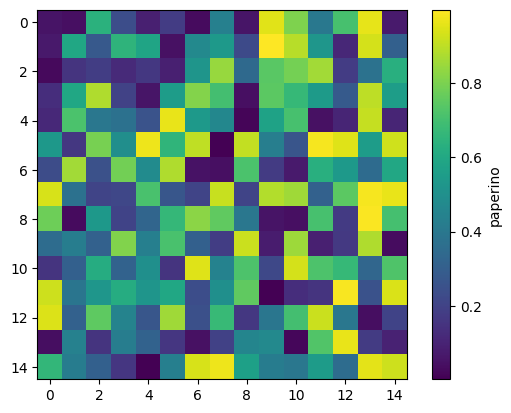

In [25]:
a = np.diag(range(15))

print(a.shape)
b = np.random.rand(15,15)
print(b)
plt.imshow(b)

#plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='paperino')
plt.colorbar(label='paperino')
plt.show()

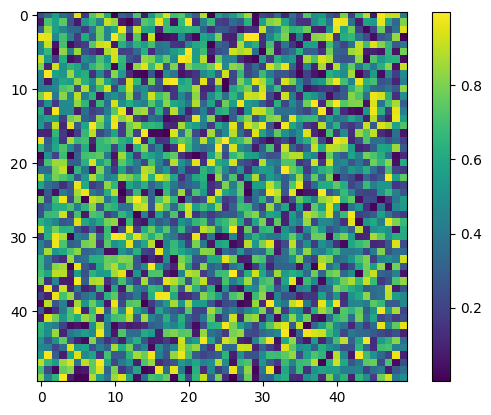

In [26]:
plt.imshow(np.random.random((50,50)))
plt.colorbar()
plt.show()

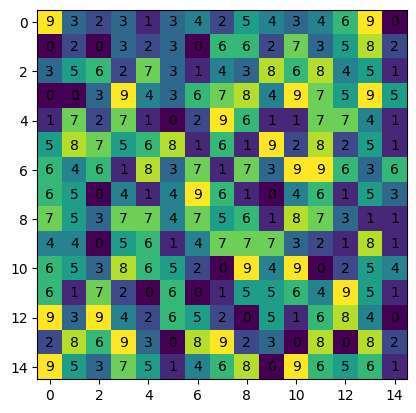

In [27]:
fig, ax = plt.subplots()

min_val, max_val = 0, 15

intersection_matrix = np.random.randint(0, 10, size=(max_val, max_val))

ax.imshow(intersection_matrix)

for i in range(min_val,max_val):
    for j in range(0,15):
        c = intersection_matrix[j,i]
        ax.text(i, j, str(c), va='center', ha='center')

# Esempio di analisi di uno step temporale

In [29]:
durata = 150-50
starting_point = 5

new_series = allPixelNDVIPoly[:,starting_point:durata]

num_cluster = 3

km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=25,
                      random_state=0)
y_pred = km.fit_predict(new_series)

rese_c1 = newResa3[y_pred == 0]
rese_c2 = newResa3[y_pred == 1]
rese_c3 = newResa3[y_pred == 2]

In [30]:
silhouette_score(allPixelNDVIPoly,y_pred,metric="euclidean")

# Calcoliamo il 'centroide' come la media della resa dei cluster

rese = [rese_c1,rese_c2,rese_c3]
meanValue = []

for a in rese:
    meanValue.append(np.mean(a))

# Calcolo le metriche di coesione

coesion = []
separation = []

for a,b in zip(meanValue,rese):   
    sum = 0
    for c in b:
        sum += (c-a)**2
    print(np.sqrt(sum/(len(b)-1)))
    print(len(b))
    coesion.append(np.sqrt(sum/(len(b)-1)))

# Calcolo della separazione

for a in meanValue:
    separation.append([])
    for b in meanValue:
        separation[-1].append(abs(a-b))


1008.7689729291504
655
1003.1680736216208
660
1052.1900349778355
156


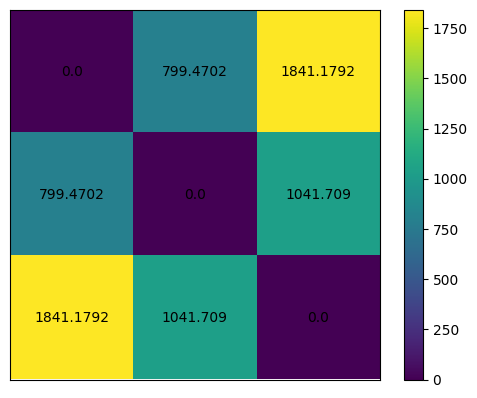

In [67]:
import matplotlib as mpl

fig, ax = plt.subplots()

separation = np.array(separation)
image = ax.imshow(separation)

'''ax.tick_params(axis='y',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)

ax.tick_params(axis='x',          
        which='both',      
        bottom=False,      
        top=False,         
        labelbottom=False)'''

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


fig.colorbar(image)

for i in range(0,num_cluster):
    for j in range(0,num_cluster):
        c = separation[i,j]
        ax.text(i, j, str(c), va='center', ha='center')

# Iterativo

In [78]:
num_cluster = 3
silhoutte = []

for a in range(5,150,5):
    silhoutte.append([])
    for b in range(5,150,5):
        new_series = allPixelNDVIPoly[:,a:150-b]

        km = TimeSeriesKMeans(n_clusters=num_cluster, metric="euclidean", max_iter=25,
                      random_state=0)
        if(new_series.shape[1] != 0):
            y_pred = km.fit_predict(new_series)
            silhoutte[-1].append(silhouette_score(new_series,y_pred,metric="euclidean"))

        


In [82]:
import matplotlib as mpl

print(silhoutte.shape)

'''fig, ax = plt.subplots()

silhoutte = np.array(silhoutte)
image = ax.imshow(silhoutte)


ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)


fig.colorbar(image)

for i in range(0,num_cluster):
    for j in range(0,num_cluster):
        c = silhoutte[i,j]
        ax.text(i, j, str(c), va='center', ha='center')'''

(29,)


"fig, ax = plt.subplots()\n\nsilhoutte = np.array(silhoutte)\nimage = ax.imshow(silhoutte)\n\n\nax.axes.xaxis.set_visible(False)\nax.axes.yaxis.set_visible(False)\n\n\nfig.colorbar(image)\n\nfor i in range(0,num_cluster):\n    for j in range(0,num_cluster):\n        c = silhoutte[i,j]\n        ax.text(i, j, str(c), va='center', ha='center')"

In [76]:
for a in range(0,10,2):
    print(a)

0
2
4
6
8
